Original pose_image shape: (3, 1275, 800)
Transposed pose_image shape: (1275, 800, 3)


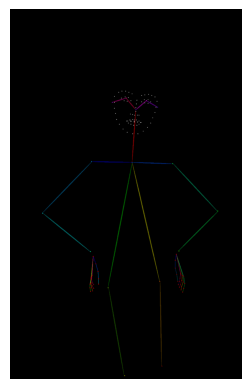

In [18]:
from dwpose.preprocess import get_image_pose
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# 使用 Pillow 读取参考图像
try:
    ref_image = Image.open('/root/autodl-tmp/EventMotion/example/reference/02.jpeg')
    # 将图像转换为 NumPy 数组
    ref_image_rgb = np.array(ref_image)
except FileNotFoundError:
    print("文件未找到，请检查文件路径是否正确。")
except Exception as e:
    print(f"无法读取图像文件：{e}")
    ref_image_rgb = None

if ref_image_rgb is not None:
    # 检查图像是否为 RGBA 格式（带有透明度通道）
    if ref_image_rgb.shape[2] == 4:
        # 如果有 Alpha 通道，去除 Alpha 通道
        ref_image_rgb = ref_image_rgb[:, :, :3]

    # 确保图像为 RGB 格式
    if ref_image.mode != 'RGB':
        ref_image_rgb = ref_image.convert('RGB')
        ref_image_rgb = np.array(ref_image_rgb)

    # 调用 get_image_pose 方法
    pose_image = get_image_pose(ref_image_rgb)

    # 检查返回的图像形状
    print("Original pose_image shape:", pose_image.shape)

    # 如果返回的图像是 (height, width, 3) 形状，则不需要转置
    if pose_image.shape[2] == 3:
        # 直接使用 pose_image
        print("Pose image is already in the correct shape.")
    else:
        # 重新排列维度
        pose_image = np.transpose(pose_image, (1, 2, 0))
        print("Transposed pose_image shape:", pose_image.shape)

    # 显示输出的骨架图
    plt.imshow(pose_image)
    plt.axis('off')  # 隐藏坐标轴
    plt.show()
else:
    print("由于无法读取图像，程序终止。")


In [ ]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image

# 读取图像
image_path='/root/autodl-tmp/EventMotion/example/reference/0001.png'





使用 Pillow 成功读取图像。
